**Exercise** Exploring linear regression

a) Make an artificial test case: write a function that receives an integer $n$ and

- Generates $n$ random values uniformly distributed in the interval $[0.0, 2.0]$
- Computes $y = 4 + 3x$
- Adds a Gaussian noise to $y$, of zero mean and unit standard deviation
- Returns $x$ and $y$

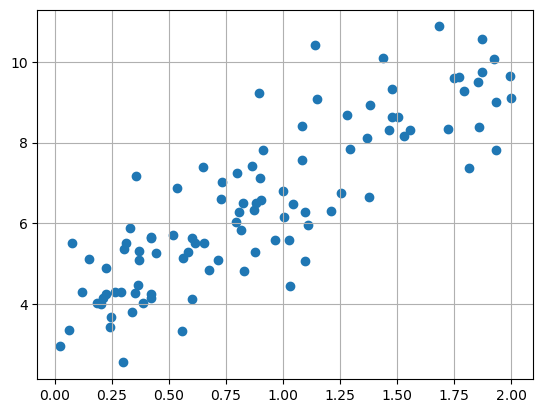

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 

def a(n):
    x = np.random.uniform(0, 2, [n,1])
    x.sort()
    y = [(4+3*x1) for x1 in x]
    erro = np.random.normal(0,1,[n,1])
    y_erro = y+erro  
    return([x,y_erro])

f = a(100)
  
plt.scatter(f[0], f[1])
plt.grid() 
plt.show()


b) Generate $n=10$ points and plot the points. Fit a linear regression model to this data. Record the fit parameters. Now repeat the procedure a total of $1000$ times and plot the histogram of the intercept and the coefficient.

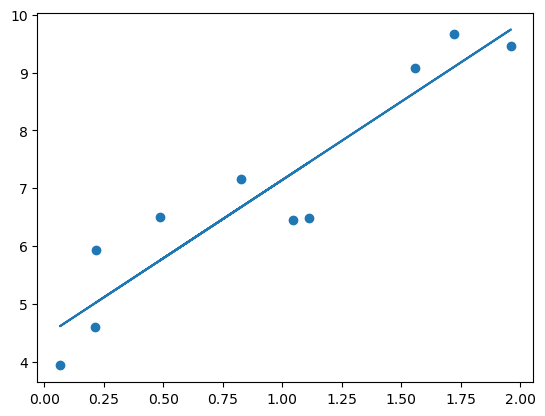

In [3]:
from scipy import stats
from sklearn.linear_model import LinearRegression

f1 = a(10)
model = LinearRegression().fit(f1[0], f1[1])

y_pred = model.predict(f1[0])



plt.scatter(f1[0], f1[1])
plt.plot(f1[0], y_pred)
plt.show()

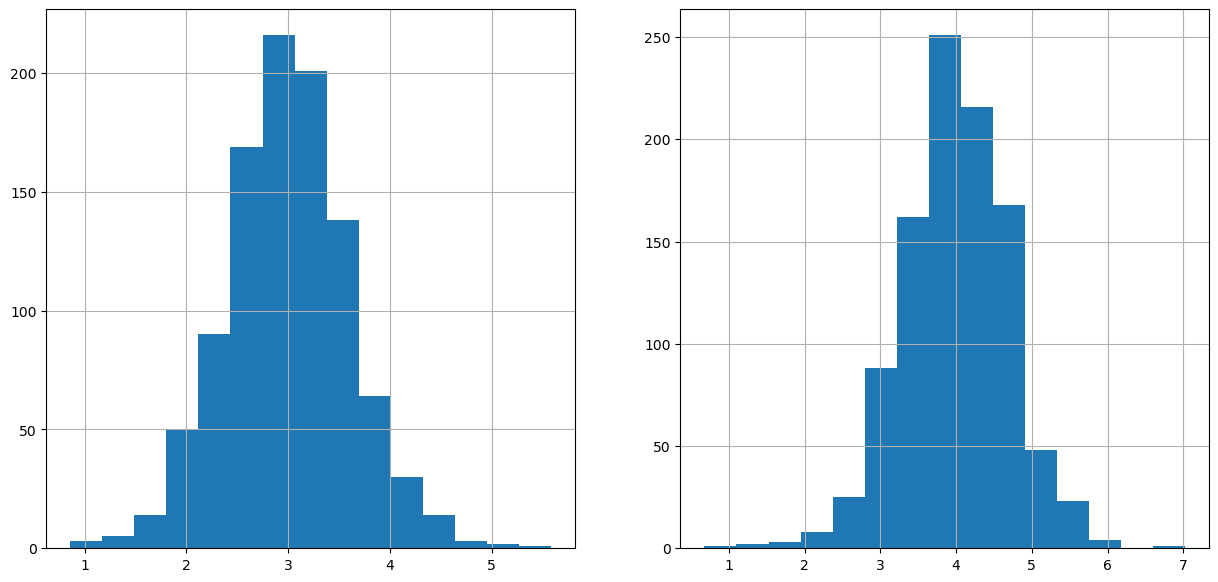

In [10]:
coef_a = []
coef_b = []
for i in range(1000):
  f2 = a(10)
  model = LinearRegression().fit(f2[0], f2[1])
  y_pred = model.predict(f2[0])
  coef_a.append(model.coef_[0][0])
  coef_b.append(model.intercept_[0])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(coef_a, bins = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(coef_b, bins = 15)
plt.grid()
plt.show()


c) Repeat item (b) but for $n=1000$ points. What do you observe?

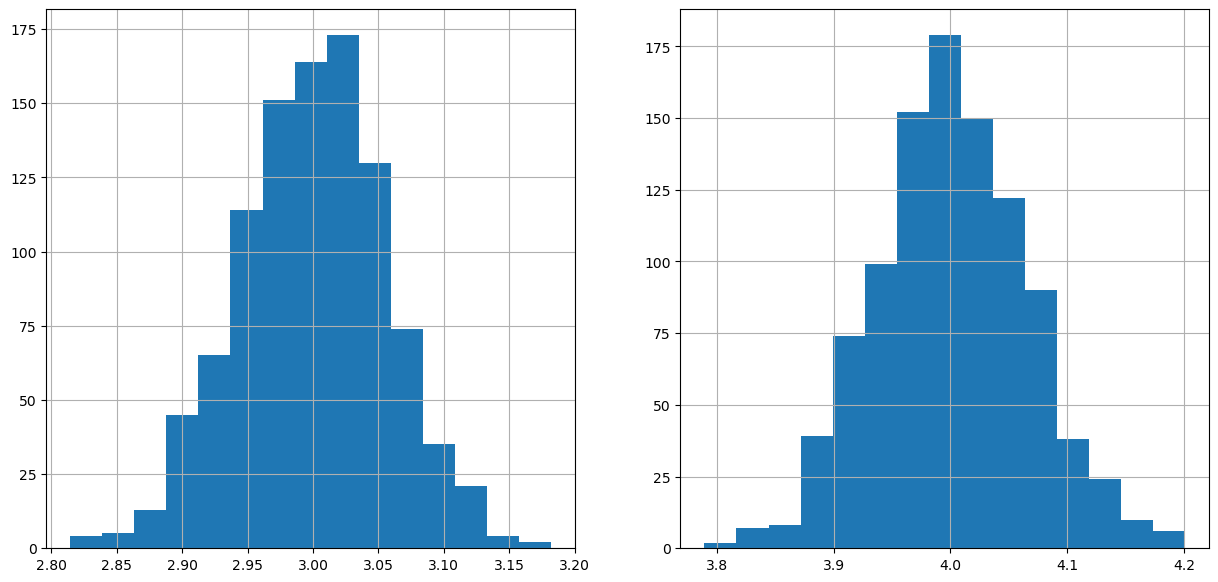

In [11]:
coef_a = []
coef_b = []
for i in range(1000):
  f3 = a(1000)
  model = LinearRegression().fit(f3[0], f3[1])
  y_pred = model.predict(f3[0])
  coef_a.append(model.coef_[0][0])
  coef_b.append(model.intercept_[0])

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(coef_a, bins = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(coef_b, bins = 15)
plt.grid()
plt.show()

**Exercise** Exploring polynomial regression

a) Make an artificial test case: write a function that receives an integer $n$ and

- Generates $n$ random values uniformly distributed in the interval $[-3.0, 3.0]$
- Computes $y = 0.5 x^2 + x + 2$
- Adds a Gaussian noise to $y$, of zero mean and unit standard deviation

In [24]:
def a1(n):
    x = np.random.uniform(-3, 3, n)
    x.sort()
    y = [(0.5*x1**2 + x1+2) for x1 in x]
    erro = np.random.normal(0,1,n)
    y_erro = y+erro
    return([x,y_erro])

b) Generate $n=10$ points and plot the points. Fit a linear regression model to this data. Record the fit parameters. Now repeat the procedure a total of $1000$ times and plot the histogram of the parameters.

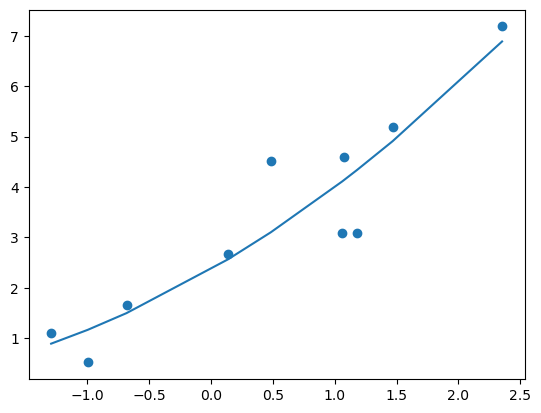

In [25]:
from sklearn.preprocessing import PolynomialFeatures

f2 = a1(10)
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(f2[0].reshape(-1,1))
model1 = LinearRegression().fit(poly_features, f2[1])

y_pred1 = model1.predict(poly_features)



plt.scatter(f2[0], f2[1])
plt.plot(f2[0], y_pred1)
plt.show()

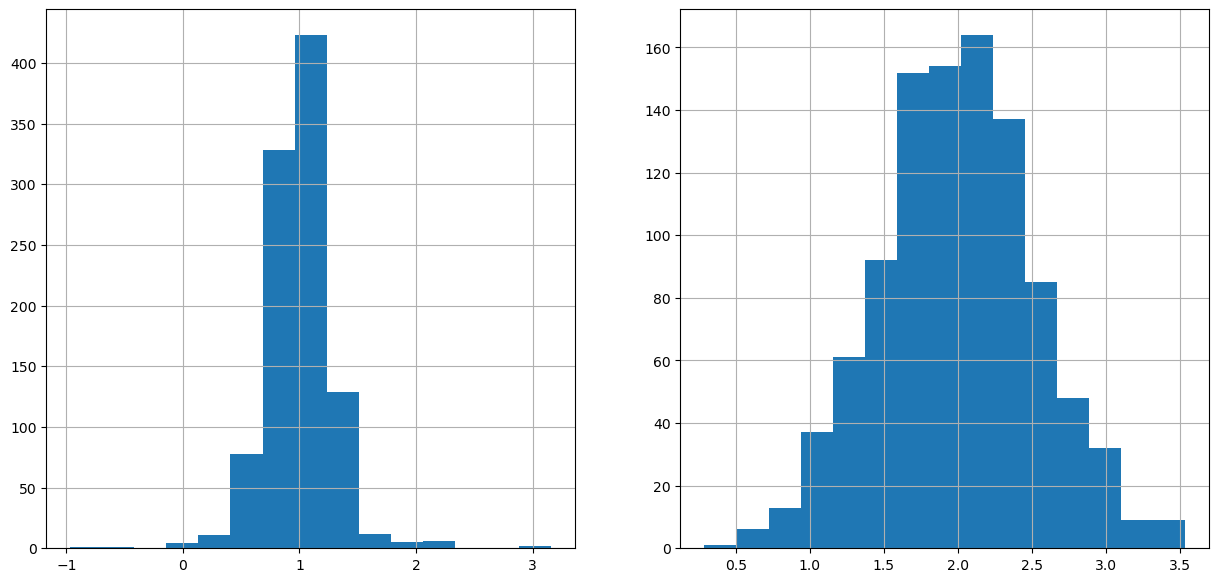

In [28]:
coef_a = []
coef_b = []
for i in range(1000):
  f2 = a1(10)
  poly = PolynomialFeatures(degree=2, include_bias=False)
  poly_features = poly.fit_transform(f2[0].reshape(-1,1))
  model = LinearRegression().fit(poly_features, f2[1])
  y_pred = model.predict(poly_features)
  coef_a.append(model.coef_[0])
  coef_b.append(model.intercept_)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(coef_a, bins = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(coef_b, bins = 15)
plt.grid()
plt.show()


c) Repeat item (b) but for $n=1000$ points. What do you observe?

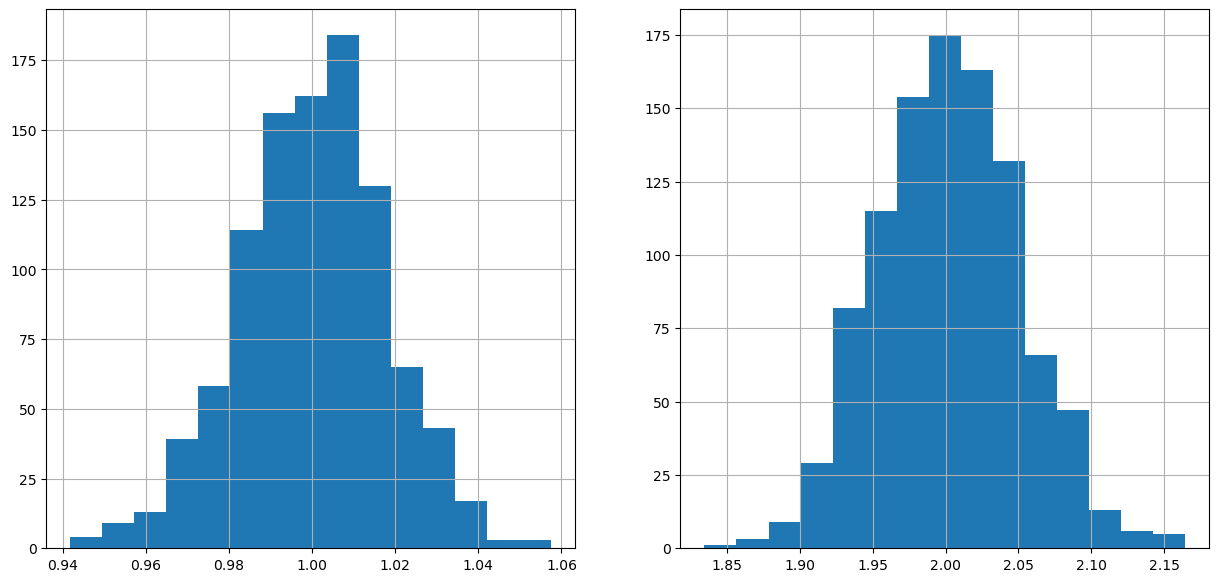

In [29]:
coef_a = []
coef_b = []
for i in range(1000):
  f2 = a1(1000)
  poly = PolynomialFeatures(degree=2, include_bias=False)
  poly_features = poly.fit_transform(f2[0].reshape(-1,1))
  model = LinearRegression().fit(poly_features, f2[1])
  y_pred = model.predict(poly_features)
  coef_a.append(model.coef_[0])
  coef_b.append(model.intercept_)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(coef_a, bins = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(coef_b, bins = 15)
plt.grid()
plt.show()
